In [168]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from matplotlib.patches import Patch
import string as st


In [169]:

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',60)

csv_path = "data/GamingStudy_data.csv"

# Load the CSV file into a pandas DataFrame with an alternative encoding
data = pd.read_csv(csv_path, encoding='latin1')

# # Shuffle the data and reset the index
# data = data.sample(frac=1, random_state=111).reset_index(drop=True)

# # Determine the split index
# split_index = int(0.8 * len(data))  # 80% for training, 20% for testing

# # Split the data
# train_data = data[:split_index]
# test_data = data[split_index:]


In [170]:
display(data.head())
print("Shape of data:",data.shape)


,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


Shape of data: (13464, 55)


In [171]:
import pandas as pd

# Define the column types based on your description
column_types = {
    "S. No.": "Nominal Categorical",
    "Timestamp": "Continuous Numerical",
    **{f"GAD{i}": "Ordinal Categorical" for i in range(1, 8)},
    **{f"SWL{i}": "Ordinal Categorical" for i in range(1, 6)},
    **{f"SPIN{i}": "Ordinal Categorical" for i in range(1, 18)},
    "GADE": "Ordinal Categorical",
    "Game": "Nominal Categorical",
    "Platform": "Nominal Categorical",
    "Hours": "Continuous Numerical",
    "Earnings": "Text",
    "whyplay": "Text",
    "Narcissism": "Ordinal Categorical",
    "Gender": "Nominal Categorical",
    "Age": "Discrete Numerical",
    "Work": "Nominal Categorical",
    "Degree": "Nominal Categorical",
    "Birthplace": "Nominal Categorical",
    "Residence": "Nominal Categorical",
    "Birthplace_ISO3": "Nominal Categorical",
    "Residence_ISO3": "Nominal Categorical",
    "Reference": "Nominal Categorical",
    "Playstyle": "Text",
    "accept": "Nominal Categorical",
    "GAD_T": "Discrete Numerical",
    "SWL_T": "Discrete Numerical",
    "SPIN_T": "Discrete Numerical",
    "streams": "Discrete Numerical",
    "League": "Text",
    "earnings": "Text",
}

# Assign variable type to all columns
data_types = pd.Series({col: column_types.get(col, "Unknown") for col in data.columns}, name="Variable Type")

# Calculate missing values and their percentage
total_rows = len(data)
missing_summary = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage': (data.isna().sum() / total_rows) * 100,
    'Variable Type': data_types
}).sort_values(by='Missing Values', ascending=False)

# Display the summary
display(missing_summary)


,Missing Values,Percentage,Variable Type
highestleague,13464,100.000000,Unknown
League,1852,13.755199,Text
Degree,1577,11.712715,Nominal Categorical
SPIN_T,650,4.827689,Discrete Numerical
GADE,649,4.820261,Ordinal Categorical
accept,414,3.074866,Nominal Categorical
SPIN13,187,1.388889,Ordinal Categorical
SPIN11,187,1.388889,Ordinal Categorical
SPIN17,175,1.299762,Ordinal Categorical
SPIN12,168,1.247772,Ordinal Categorical


Skipping histogram for S. No. (unique values: 13464)
Skipping histogram for Timestamp (unique values: 11734)
Skipping histogram for Hours (unique values: 84)
Skipping histogram for earnings (unique values: 314)
Skipping histogram for whyplay (unique values: 407)
Skipping histogram for League (unique values: 1454)
Skipping histogram for streams (unique values: 65)


C:\Users\hazem\AppData\Local\Temp\ipykernel_603180\4118190320.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))  # Set the size for each plot


Skipping histogram for Birthplace (unique values: 126)
Skipping histogram for Residence (unique values: 109)
Skipping histogram for Playstyle (unique values: 298)
Skipping histogram for SPIN_T (unique values: 69)
Skipping histogram for Residence_ISO3 (unique values: 107)
Skipping histogram for Birthplace_ISO3 (unique values: 124)


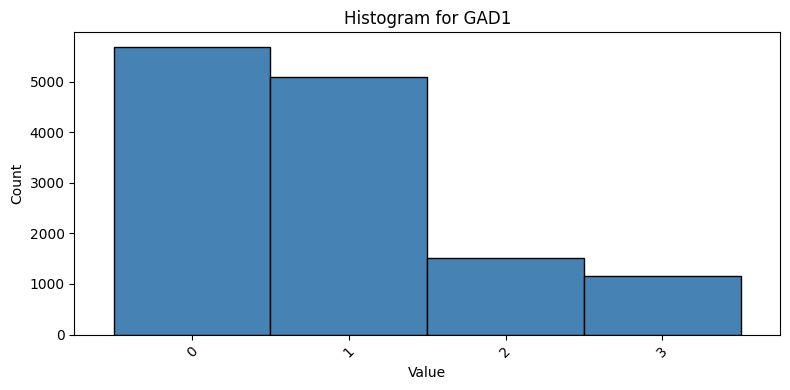

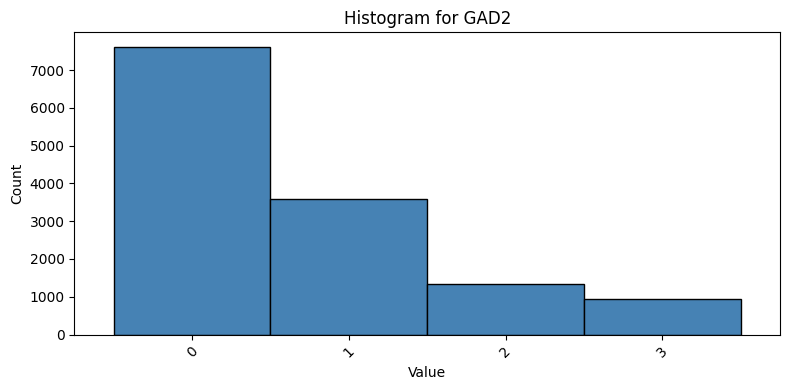

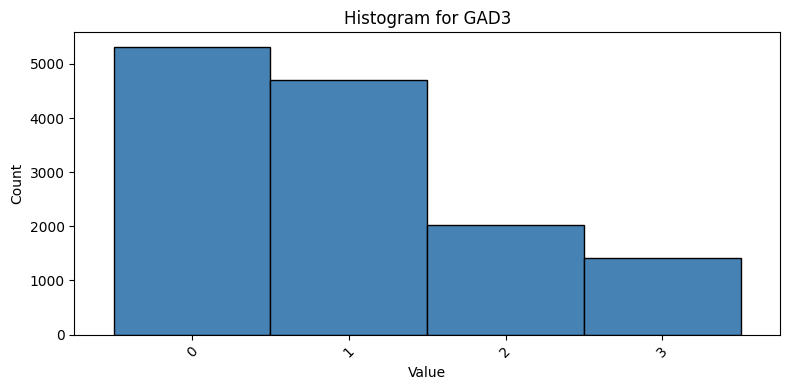

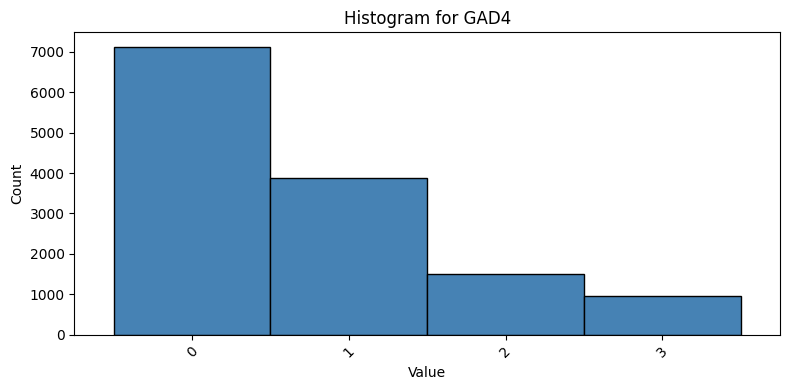

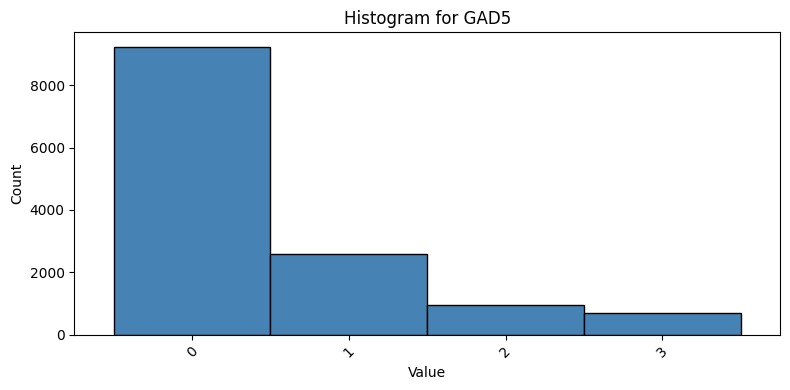

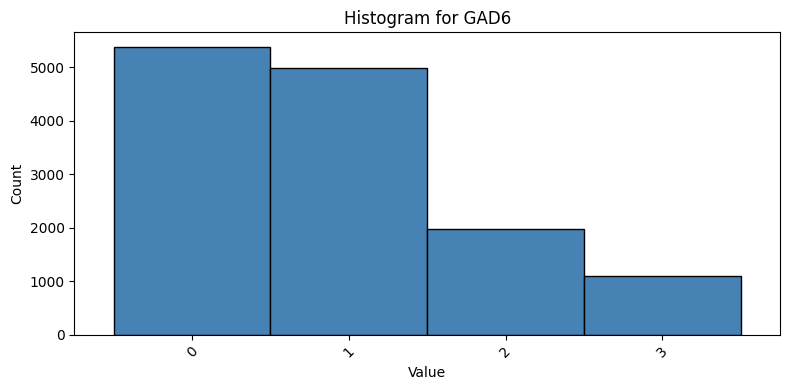

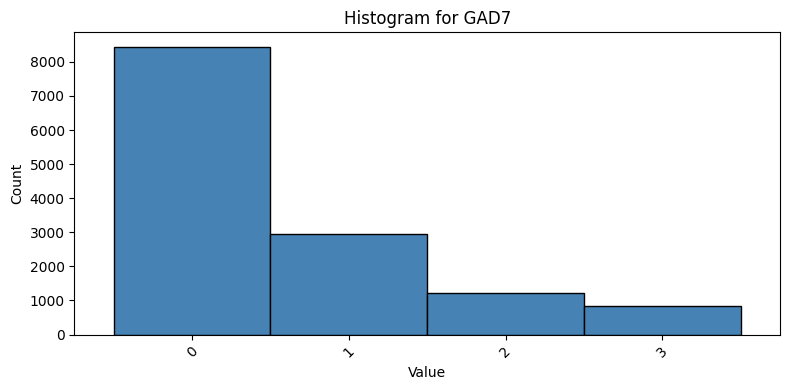

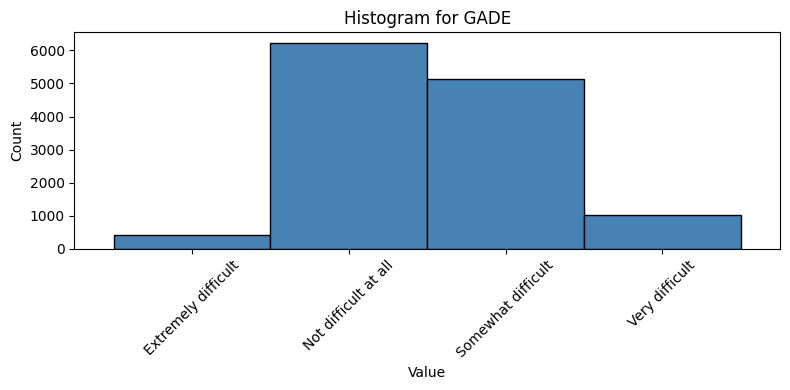

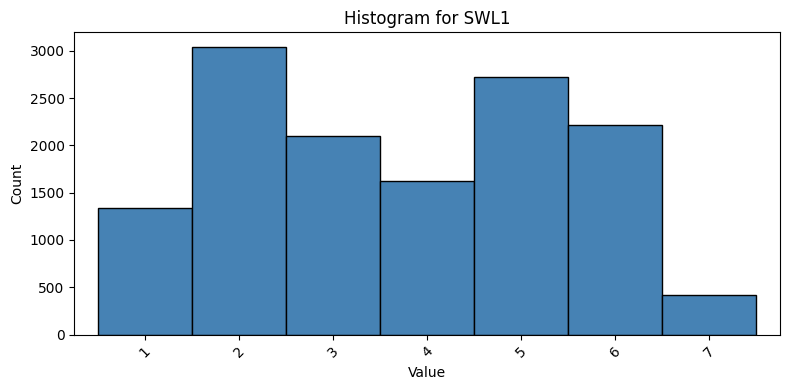

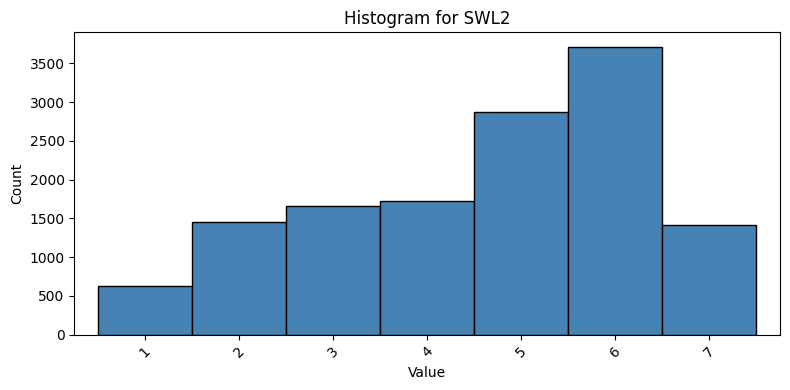

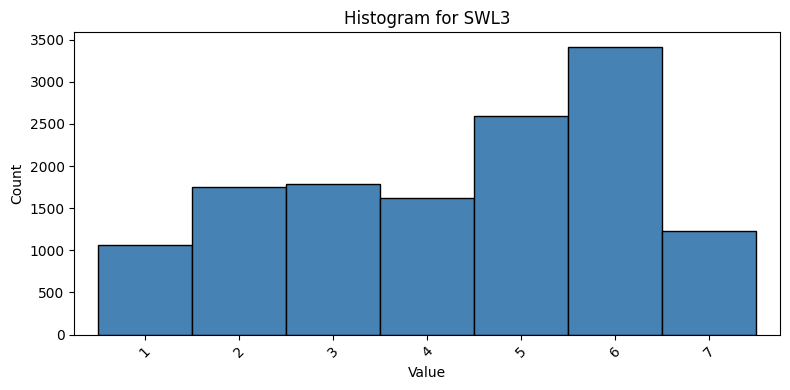

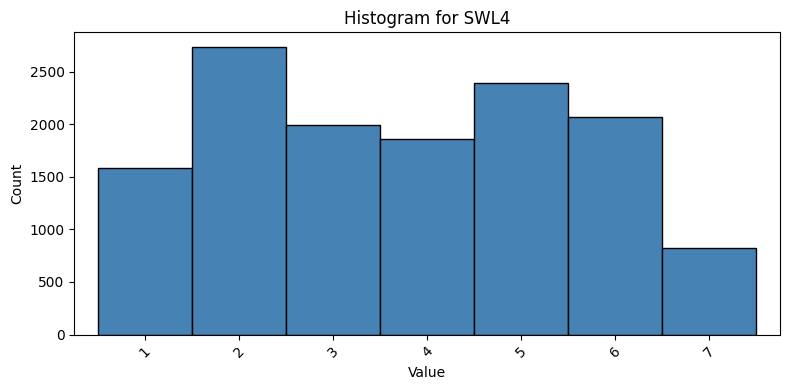

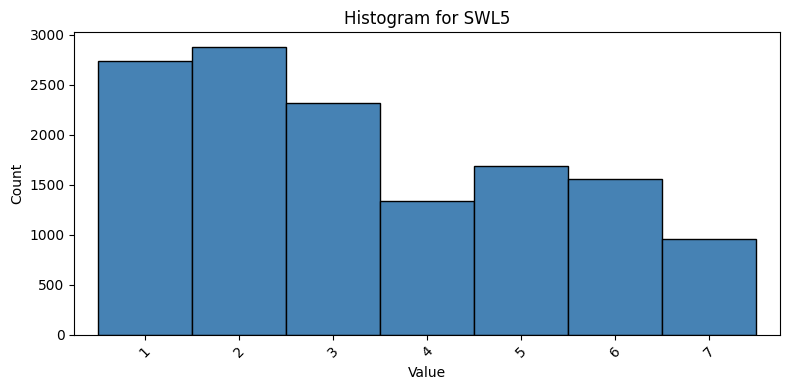

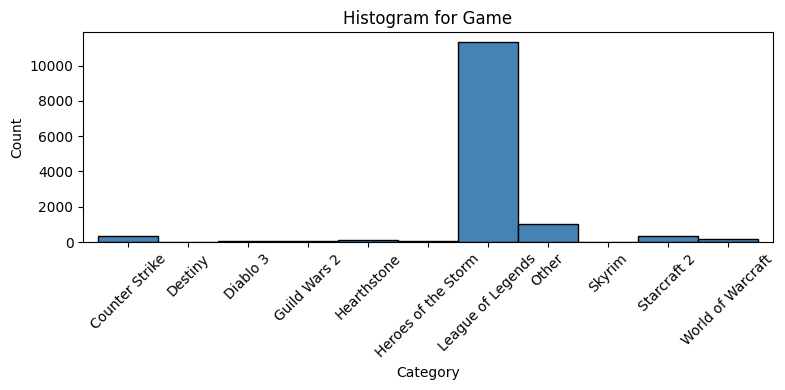

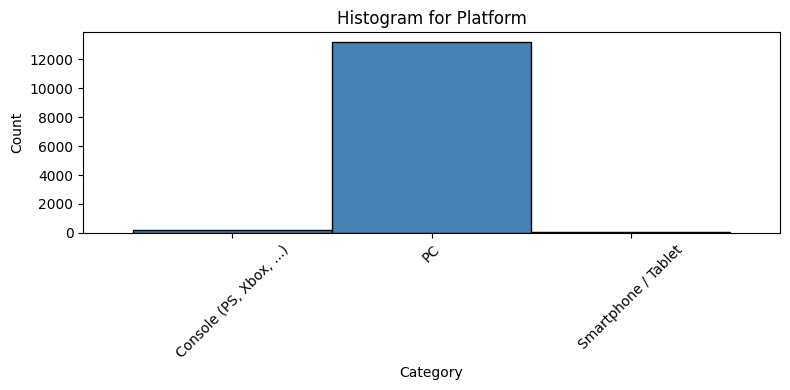

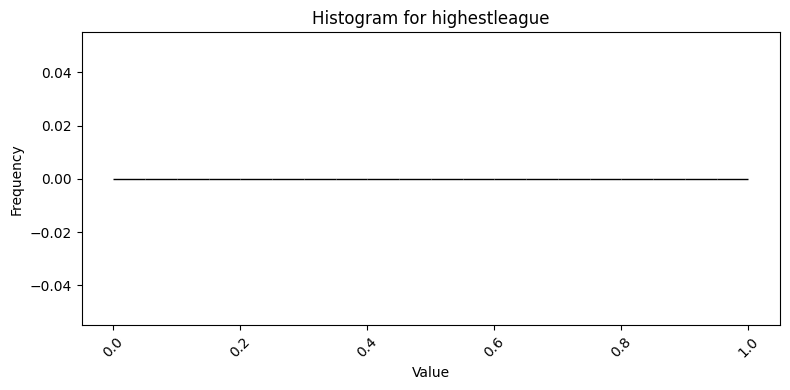

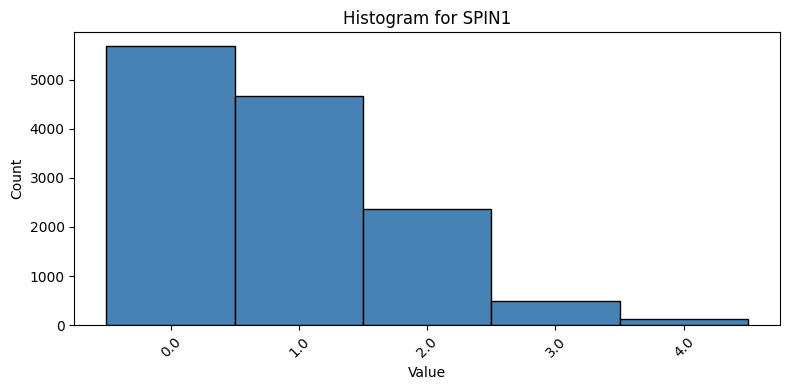

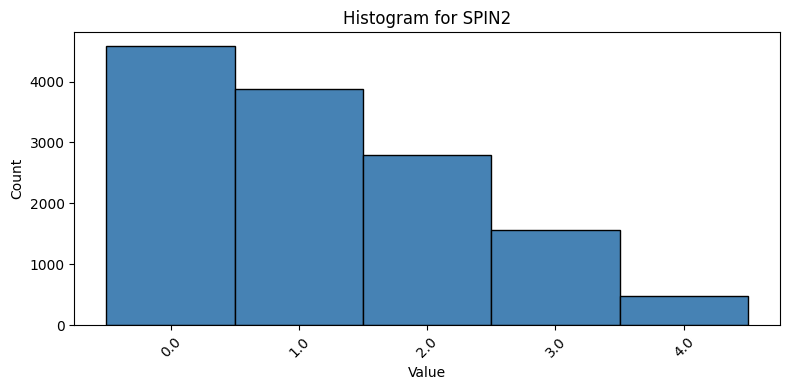

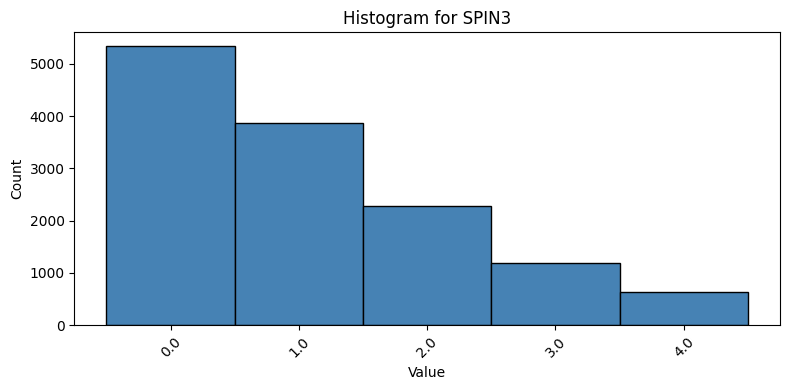

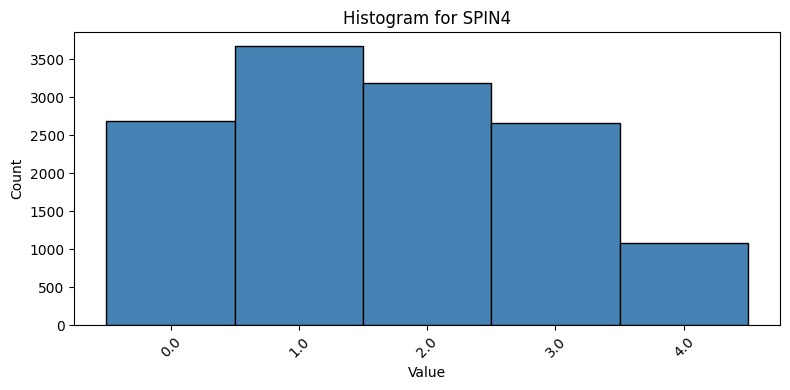

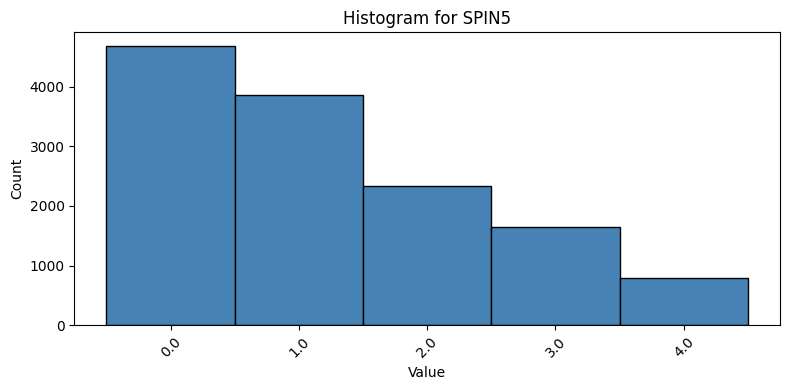

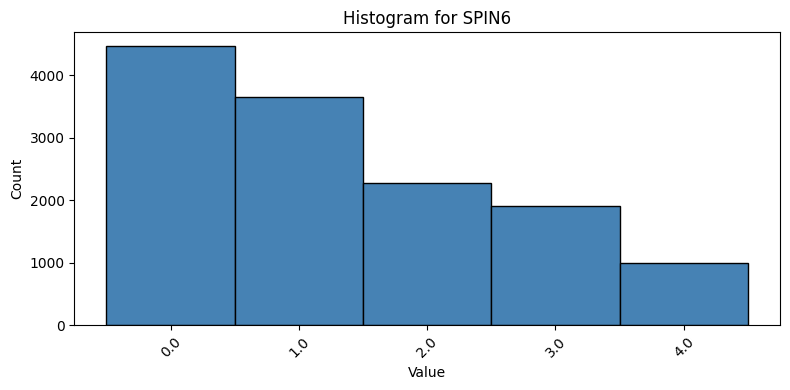

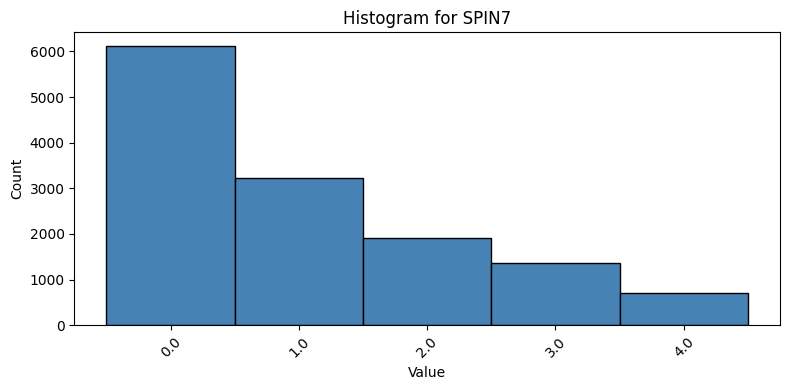

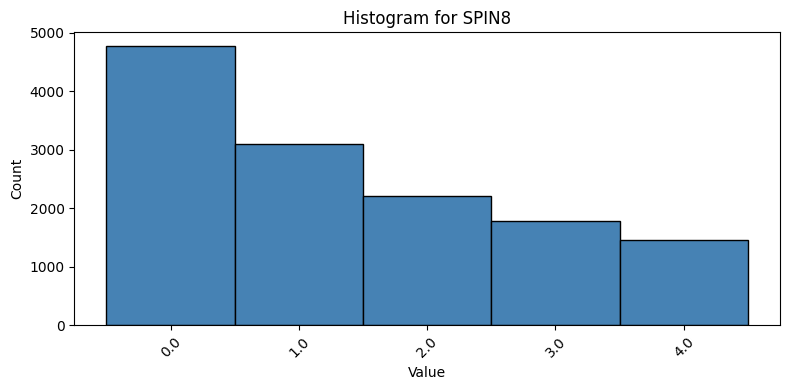

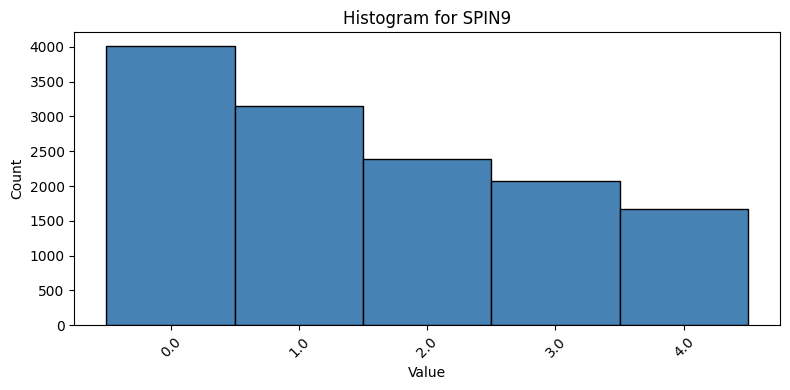

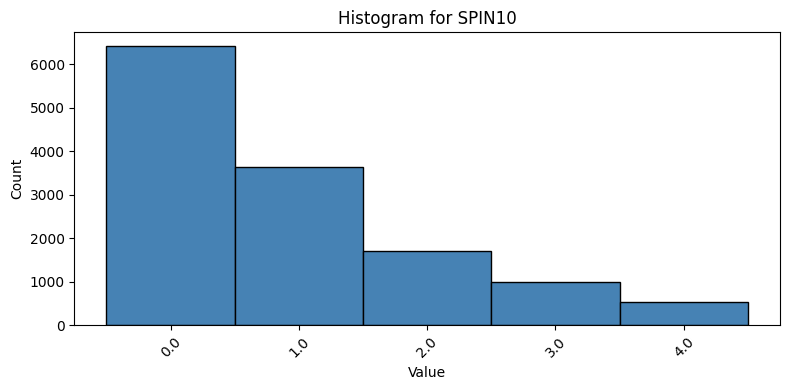

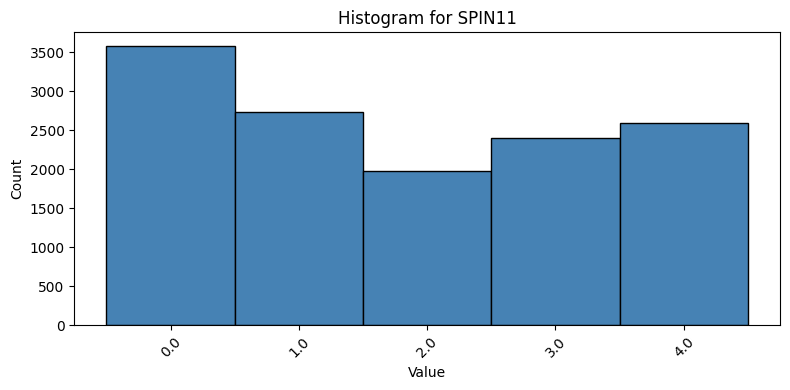

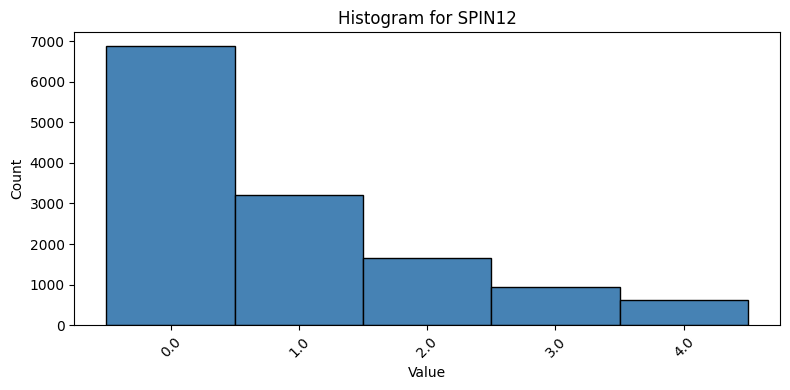

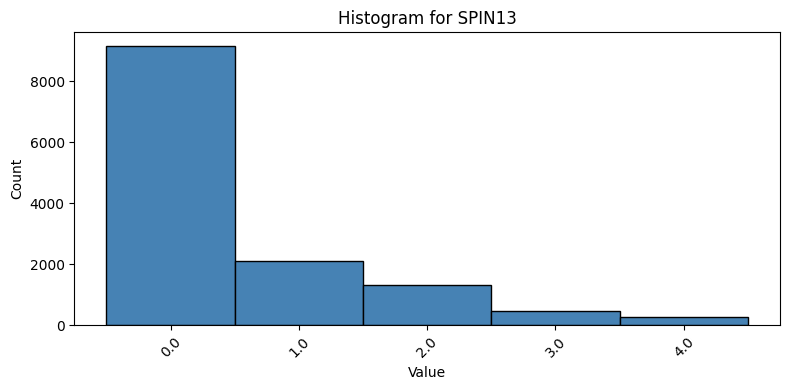

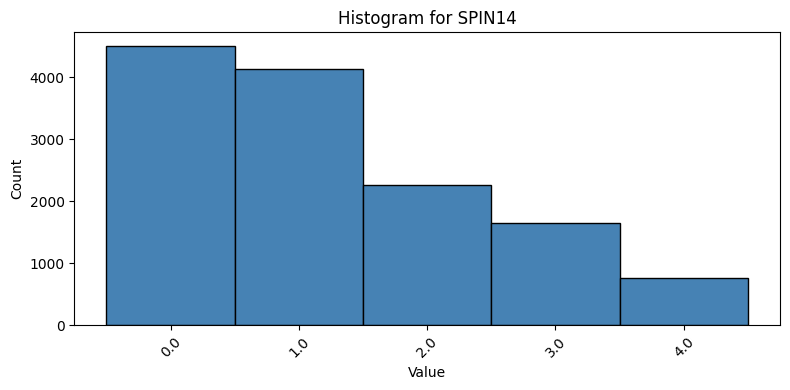

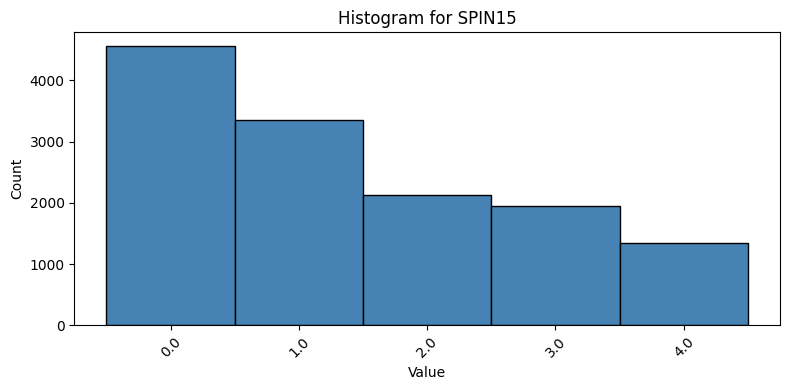

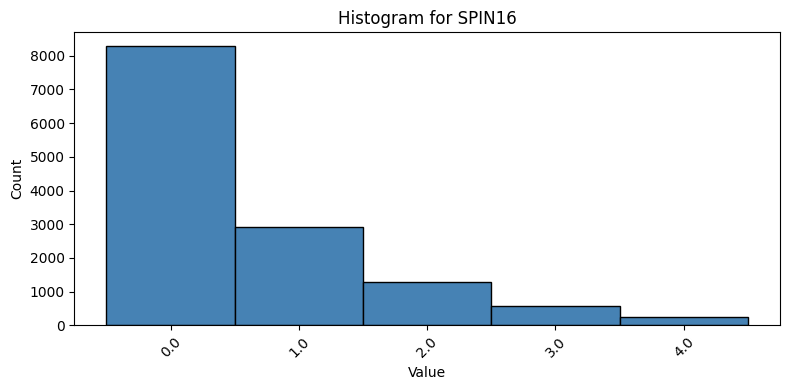

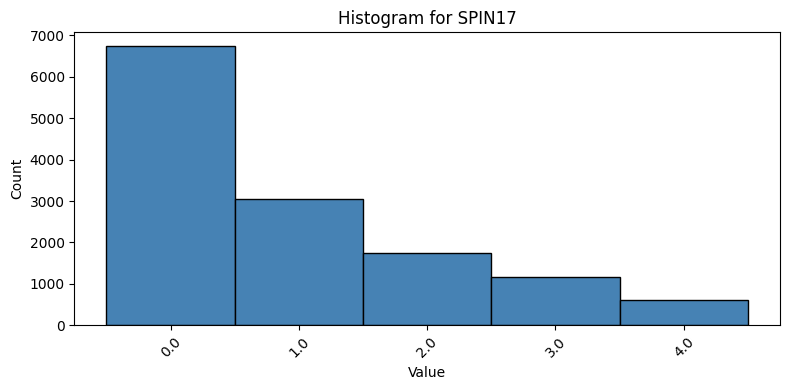

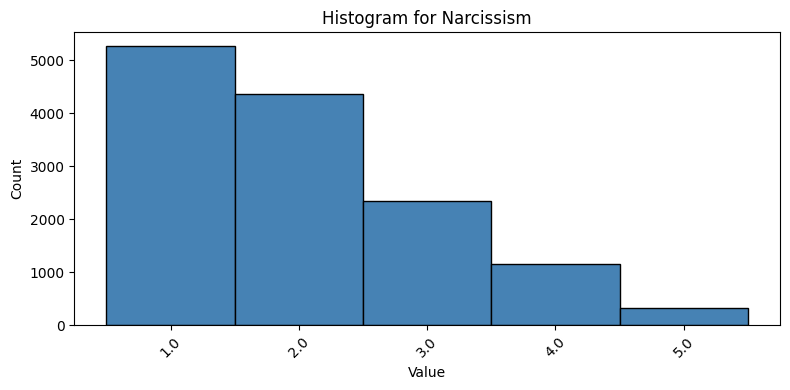

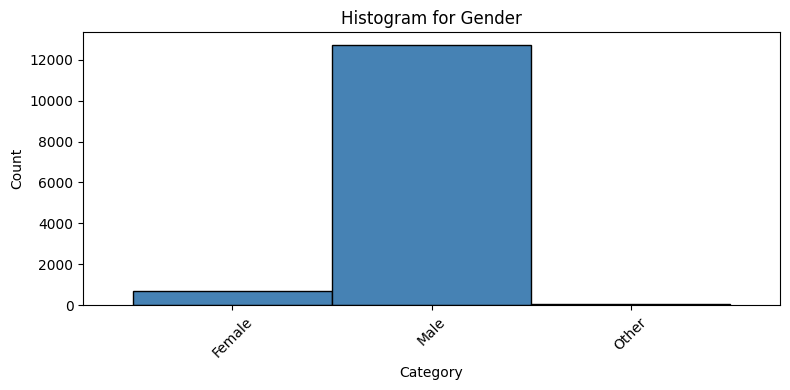

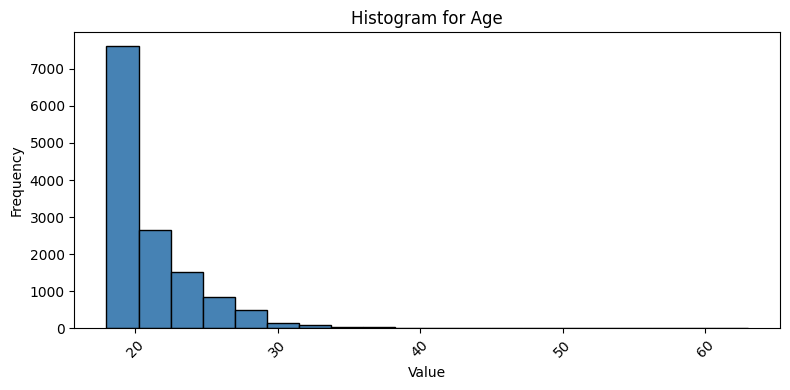

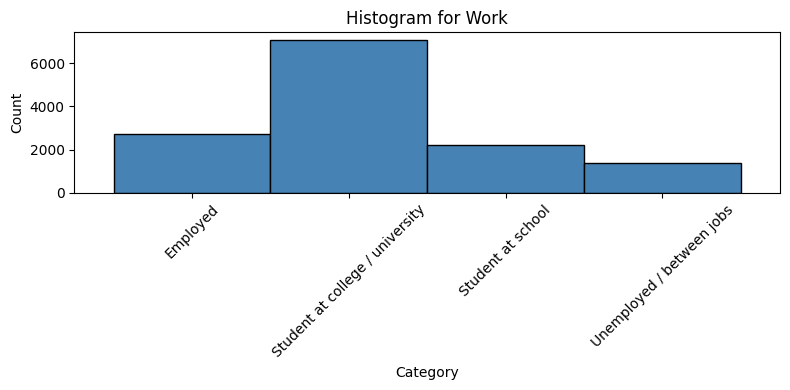

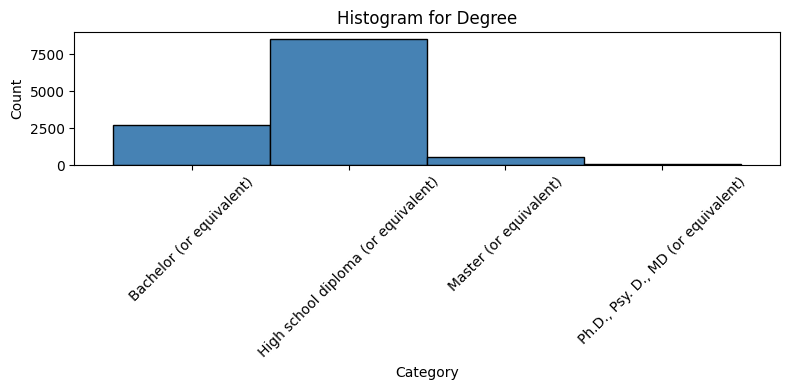

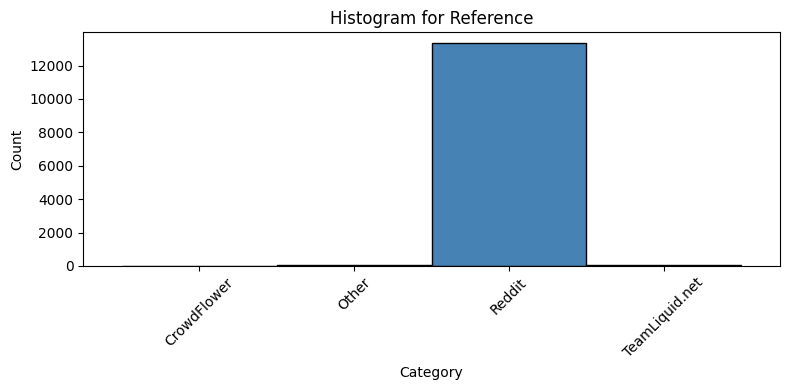

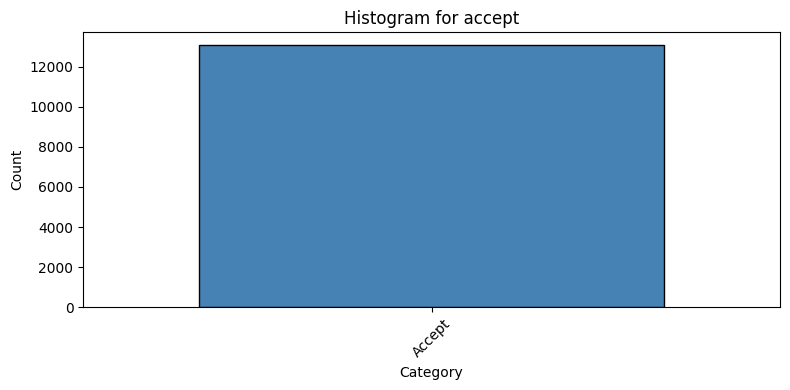

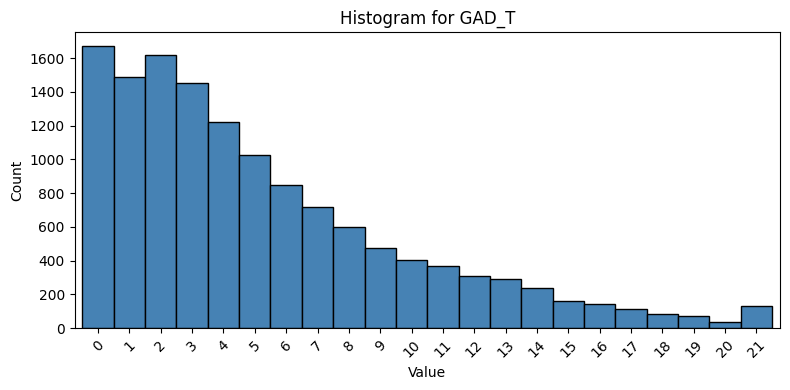

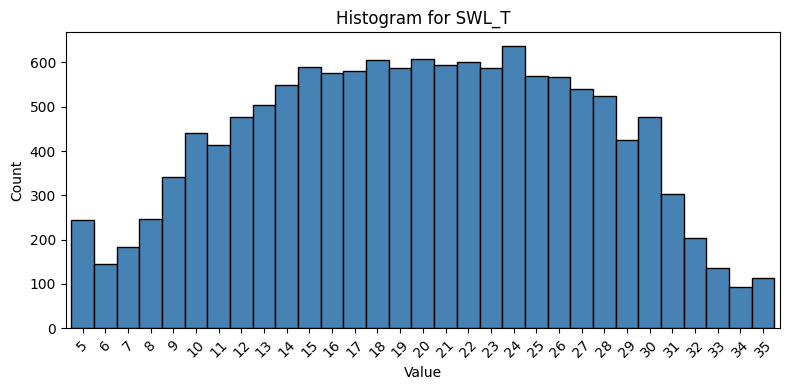

In [172]:
import matplotlib.pyplot as plt

# Iterate through each column in the dataset
for column in data.columns:
    unique_values = data[column].nunique()  # Count unique values
    if unique_values > 40:  # Skip columns with more than 40 unique values
        print(f"Skipping histogram for {column} (unique values: {unique_values})")
        continue

    plt.figure(figsize=(8, 4))  # Set the size for each plot

    # Check if the column name contains 'GAD', 'SPIN', or 'SWL'
    if any(keyword in column for keyword in ['GAD', 'SPIN', 'SWL', 'Narcissism']):
        # Treat as discrete whole values
        data[column].value_counts().sort_index().plot(
            kind='bar', 
            color='steelblue', 
            edgecolor='black', 
            width=1.0  # Full-width bars
        )
        plt.xlabel('Value')
        plt.ylabel('Count')
    elif data[column].dtype in ['int64', 'float64']:  # Numerical features
        # Use plt.hist for numerical data
        plt.hist(
            data[column].dropna(), 
            bins=20, 
            color='steelblue', 
            edgecolor='black'
        )
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    else:  # Other categorical features
        data[column].value_counts().sort_index().plot(
            kind='bar', 
            color='steelblue', 
            edgecolor='black', 
            width=1.0  # Full-width bars
        )
        plt.xlabel('Category')
        plt.ylabel('Count')

    plt.title(f'Histogram for {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout
    # plt.show()  # Display the plot


The above dataset has many interesting features that can be noticed at a glance. First, let us dive into what the dataset contains and the significance of each point:

**S. No.**: This is the subject number column, containing all of the subject numbers in the dataset. This is a nominal categorical variable, as the value has no true meaning in the dataset.

**Timestamp**: This is the timestamp at which the online gaming anxiety data was collected. This is a continuous numerical variable.

**Survey Questions GAD1 to GAD7**: These represent specific questions related to generalized anxiety. Each response is on a scale from 1 to 3, 1 being the statement never happened within the last 2 weeks and 3 being the statement happened every day within the last 2 weeks. This is an ordinal categorical variable. The following are the questions that the participant answers, in order of GAD1 to GAD7:
- Feeling nervous, anxious, or on edge?
- Not being able to stop or control worrying?
- Worrying too much about different things?
- Having trouble relaxing?
- Being so restless that it’s hard to sit still?
- Becoming easily annoyed or irritable?
- Feeling afraid as if something awful might happen?

**Survey Questions SWL1 to SWL5**: These represent specific questions related to satisfaction with life. Each response is on a scale from 1 to 5, 1 being strongly disagree with the statement and 7 being strongly agree with the statement. This is an ordinal categorical variable. The following are the statements in the questionnaire:
- In most ways, my life is close to my ideal.
- I am bothered by blushing in front of people
- Parties and social events scare me
- I avoid talking to people I don't know
- Being criticized scares me a lot
- Fear of embarrassment causes me to avoid doing things or speaking to people
- Sweating in front of people causes me distress
- I avoid going to parties
- I avoid activities in which I am the centre of attention
- Talking to strangers scares me
- I avoid having to give speeches
- I would do anything to avoid being criticized
- Heart palpitations bother me when I am around people
- I am afraid of doing things when people might be watching
- Being embarrassed or looking stupid is among my worst fears
- I avoid speaking to anyone in authority
- Trembling or shaking in front of others is distressing to me

**Survey Questions SPIN1 to SPIN17**: These represent specific questions related to the social phobia inventory scale. Each response is on a scale from 0 to 4, 0 being the statement does not apply at all and 4 being the statement applies extremely. This is an ordinal categorical variable. The following are the statements in the questionnaire:
- I am afraid of people in authority
- The conditions of my life are excellent.
- I am satisfied with my life.
- So far, I have gotten the important things I want in life.
- If I could live my life over, I would change almost nothing.

**GADE**: This column refers to the affect of gaming in work. This is an ordinal categorical variable.

**Game**: This column refers to the name of the game the subject plays. This is a categorical variable.

**Platform**: This column refers to the mode of game playing such as mobile, PC, Console, etc. This is a nominal categorical variable.

**Hours**: This column refers to the number of hours in a week the participant devoted to playing. This is a continuous numerical variable.

**Earnings**: This column refers to if the participant earns money through gaming. As this is an open response to the participant, it is text data.

**whyplay**: This column refers to why the participant plays games. As this is also an open response to the participant, it is text data.

**Narcissism**: This column represents the participant's interest in the game on a scale from 1 to 5, 1 being least interested and 5 being most interested. This is an ordinal categorical. variable.

**Gender**: this column represents the gender of the participant. This is a nominal categorical variable.

**Age**: This column represents the age of the participant in years. This is a discrete variable.

**Work**: This column represents the work status of the participant. This is a nominal categorical variable.

**Degree**: this column represents the highest academic degree attained by the participant. This is a nominal categorical variable.

**Birthplace**: This column represents the birthplace country of the gamer. This is a nominal categorical variable.

**Residence**: This column represents the current country of residence of the gamer. This is a nominal categorical variable.

**Reference**: This column represents the media in which the participant received the questionnaire. This is a nominal categorical variable.

**Playstyle**: This column represents the playstyle of the participant (multiplayer, singleplayer, etc.). This is text data.

**accept**: This column represents whether the participant accepted the terms and conditions of the questionnaire. This is a nominal categorical variable.

**GAD_T**: this column represents the sum of the GAD scores for the 5 questions. This is a discrete variable

**SWL_T**: this column represents the sum of the SWL scores for the 7 questions. This is a discrete variable

**SPIN_T**: this column represents the sum of the SPIN scores for the 17 questions. This is a discrete variable

**streams**: This column represents the number of online streaming of the game. This is a discrete variable.

# PREPROCESSING

In [173]:

data.drop(columns=['highestleague', 'S. No.', 'Timestamp'], inplace=True)
data.drop(["Birthplace", "Birthplace_ISO3"], axis=1, inplace=True)

data['Residence'] = data['Residence'].replace('Unknown', data['Residence'].mode()[0])
data['Reference'] = data['Reference'].fillna('Other')
data = data.drop(data[data['accept'].isnull()].index, axis=0)

data['Work'] = data['Work'].fillna(data['Work'].mode()[0])
data = data.drop(['Residence', 'accept'], axis=1)

data['GADE'] = data['GADE'].fillna(data['GADE'].value_counts().index[1])
data['streams'] = data['streams'].fillna(int(data['streams'].mean()))
data['Hours'] = data['Hours'].fillna(int(data['Hours'].mean()))

data['League'] = data['League'].str.lower().str.strip()
data['League'] = data['League'].str.extract(r'^([a-z]+)')
data.loc[data['whyplay'] == 'having fun', 'League'] = data.loc[data['whyplay'] == 'having fun', 'League'].fillna('unranked')
data['League'] = data['League'].fillna('gold')

counts = data['League'].value_counts()
valid_leagues = ~data['League'].isin(counts[counts < 3].index)
data.loc[~valid_leagues, 'League'] = np.nan

data['League'] = data['League'].replace(
    ['i', 'currently', 'high', 'season', 'lol', 'cs', 'last', 'csgo', 'starcraft', 'geater', 'in', 'rank', 'still'],
    np.nan
)
data['League'] = data['League'].fillna('unspecified')

cols = ['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 
        'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'SPIN_T']
for col in cols:
    data[col] = data[col].fillna(data[col].mode()[0])


for col in ['Playstyle', 'earnings', 'whyplay']:
    data[col] = data[col].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
    data[col] = data[col].str.lower().str.strip()

data['earnings'] = data['earnings'].replace(data['earnings'].value_counts().index[3:], 'Other')
data['whyplay'] = data['whyplay'].replace(data['whyplay'].value_counts().index[5:], 'Other')
data['Playstyle'] = data['Playstyle'].replace(data['Playstyle'].value_counts().index[5:], 'Other')

data['Playstyle'] = data['Playstyle'].replace('Other', np.nan)
data['whyplay'] = data['whyplay'].replace('Other', np.nan)
data['earnings'] = data['earnings'].replace('Other', np.nan)
data['Platform'] = data['Platform'].replace('Console (PS, Xbox, ...)', 'Console')
# Drop unwanted columns
# data = data.drop(['GAD_T', 'SPIN_T', 'SWL_T'], axis=1)
# Remove rows where Narcissism is NaN
data = data.dropna(subset=['Narcissism'])



In [174]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List of columns to encode
label_encode_cols = ['GADE', 'Playstyle', 'whyplay', 'Platform', 'League', 'Reference', 'Gender', 'Work', 'Degree', 'Game', 'Residence_ISO3', 'earnings']

# One-Hot Encode the following (optional)
one_hot_encode_cols = ['Platform', 'League', 'Reference', 'earnings']

# Initialize LabelEncoder
label_encoders = {col: LabelEncoder() for col in label_encode_cols}

# Apply Label Encoding
for col in label_encode_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# One-Hot Encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)

# Display encoded data
display(data.head())

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Hours,whyplay,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Playstyle,Residence_ISO3,Platform_1,Platform_2,League_1,League_2,League_3,League_4,League_5,League_6,League_7,League_8,League_9,League_10,League_11,League_12,League_13,League_14,League_15,League_16,League_17,League_18,League_19,League_20,League_21,League_22,League_23,League_24,League_25,League_26,League_27,League_28,League_29,League_30,League_31,League_32,League_33,League_34,League_35,League_36,League_37,League_38,League_39,League_40,League_41,League_42,League_43,League_44,League_45,League_46,League_47,League_48,League_49,League_50,League_51,Reference_1,Reference_2,Reference_3,earnings_1,earnings_2,earnings_3
0,0,0,0,0,1,0,0,1,3,5,5,5,5,8,15.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,25,3,0,4,102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
1,1,2,2,2,0,1,0,2,3,5,2,5,1,7,8.0,1,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,1,41,3,0,3,102,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
2,0,2,2,0,0,3,1,1,2,6,5,2,2,7,0.0,1,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,0,32,0,0,4,23,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
3,0,0,0,0,0,0,0,1,2,5,5,3,2,7,20.0,2,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1,28,0,0,1,102,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
4,2,1,2,2,2,3,2,3,2,2,4,5,1,7,20.0,1,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1,19,0,1,3,56,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False


In [175]:
for column in data.columns:
    print(column)

GAD1
GAD2
GAD3
GAD4
GAD5
GAD6
GAD7
GADE
SWL1
SWL2
SWL3
SWL4
SWL5
Game
Hours
whyplay
streams
SPIN1
SPIN2
SPIN3
SPIN4
SPIN5
SPIN6
SPIN7
SPIN8
SPIN9
SPIN10
SPIN11
SPIN12
SPIN13
SPIN14
SPIN15
SPIN16
SPIN17
Narcissism
Gender
Age
Work
Degree
Playstyle
Residence_ISO3
Platform_1
Platform_2
League_1
League_2
League_3
League_4
League_5
League_6
League_7
League_8
League_9
League_10
League_11
League_12
League_13
League_14
League_15
League_16
League_17
League_18
League_19
League_20
League_21
League_22
League_23
League_24
League_25
League_26
League_27
League_28
League_29
League_30
League_31
League_32
League_33
League_34
League_35
League_36
League_37
League_38
League_39
League_40
League_41
League_42
League_43
League_44
League_45
League_46
League_47
League_48
League_49
League_50
League_51
Reference_1
Reference_2
Reference_3
earnings_1
earnings_2
earnings_3


In [176]:
display(data)

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Hours,whyplay,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Playstyle,Residence_ISO3,Platform_1,Platform_2,League_1,League_2,League_3,League_4,League_5,League_6,League_7,League_8,League_9,League_10,League_11,League_12,League_13,League_14,League_15,League_16,League_17,League_18,League_19,League_20,League_21,League_22,League_23,League_24,League_25,League_26,League_27,League_28,League_29,League_30,League_31,League_32,League_33,League_34,League_35,League_36,League_37,League_38,League_39,League_40,League_41,League_42,League_43,League_44,League_45,League_46,League_47,League_48,League_49,League_50,League_51,Reference_1,Reference_2,Reference_3,earnings_1,earnings_2,earnings_3
0,0,0,0,0,1,0,0,1,3,5,5,5,5,8,15.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,25,3,0,4,102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
1,1,2,2,2,0,1,0,2,3,5,2,5,1,7,8.0,1,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,1,41,3,0,3,102,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
2,0,2,2,0,0,3,1,1,2,6,5,2,2,7,0.0,1,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,0,32,0,0,4,23,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
3,0,0,0,0,0,0,0,1,2,5,5,3,2,7,20.0,2,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1,28,0,0,1,102,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
4,2,1,2,2,2,3,2,3,2,2,4,5,1,7,20.0,1,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1,19,0,1,3,56,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,1,0,0,1,0,1,1,1,6,6,5,5,6,7,40.0,2,10.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1,22,1,2,3,33,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [177]:
# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

In [199]:
# Split the data into train and test first
np.random.seed(42)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

train_size = int(0.8 * data.shape[0])
train_idx, test_idx = indices[:train_size], indices[train_size:]

train_data = data.iloc[train_idx]
test_data = data.iloc[test_idx]

# Extract features and target for train and test sets
X_train = train_data.drop(['Narcissism'], axis=1).to_numpy(dtype=np.float64)
y_train = train_data['Narcissism'].to_numpy(dtype=np.int32)  # Use integer for classification

X_test = test_data.drop(['Narcissism'], axis=1).to_numpy(dtype=np.float64)
y_test = test_data['Narcissism'].to_numpy(dtype=np.int32)  # Use integer for classification
y_train-=1
y_test-=1

# Compute mean and std from the training set only
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)

# Handle zero standard deviation
X_std[X_std == 0] = 1  # Replace std=0 with 1 to prevent division by zero

# Normalize training data
X_train = (X_train - X_mean) / X_std

# Normalize test data using training mean and std
X_test = (X_test - X_mean) / X_std

# Updated MLP class to support dynamic layers
class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.weights = []
        self.biases = []
        
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(layer_sizes) - 1):
            # Xavier initialization for weights
            limit = np.sqrt(6 / (layer_sizes[i] + layer_sizes[i + 1]))
            self.weights.append(np.random.uniform(-limit, limit, (layer_sizes[i], layer_sizes[i + 1])).astype(np.float64))
            self.biases.append(np.zeros((1, layer_sizes[i + 1]), dtype=np.float64))

    def forward(self, X, train=True):
        self.activations = []
        self.z_values = []
        activation = X
        
        for i in range(len(self.weights) - 1):
            z = np.dot(activation, self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            activation = relu(z)  # Apply ReLU activation
            self.activations.append(activation)
        
        # Output layer with softmax activation
        z = np.dot(activation, self.weights[-1]) + self.biases[-1]
        self.z_values.append(z)
        activation = self.softmax(z)
        self.activations.append(activation)
        
        return activation

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def backward(self, X, y, learning_rate):
        m = y.shape[0]
        
        # Convert y to one-hot encoding
        y_one_hot = np.zeros((m, self.weights[-1].shape[1]))
        y_one_hot[np.arange(m), y] = 1

        output_error = self.activations[-1] - y_one_hot
        output_grad = output_error / m
        
        for i in reversed(range(len(self.weights))):
            if i > 0:
                activation_grad = relu_derivative(self.z_values[i - 1])
                delta = np.dot(output_grad, self.weights[i].T) * activation_grad
            else:
                delta = np.dot(output_grad, self.weights[i].T)
            
            self.weights[i] -= learning_rate * np.dot(self.activations[i - 1].T if i > 0 else X.T, output_grad)
            self.biases[i] -= learning_rate * np.sum(output_grad, axis=0, keepdims=True)
            
            output_grad = delta

    def predict(self, X):
        probabilities = self.forward(X, train=False)
        return np.argmax(probabilities, axis=1)  # Class with highest probability


# Train the model
input_size = X_train.shape[1]
hidden_sizes = [128, 40, 20]  # Increased neurons and layers for more capacity
output_size = 5  # 5 output neurons for classification

mlp = MLP(input_size, hidden_sizes, output_size)  # Add dropout

epochs = 300  # Train for more epochs
learning_rate = 0.001  # Lower learning rate for better convergence

hidden_layer_configs = [
    [16],
    [32],
    [64],
    [128],
    [256],
    [128, 32],
    [128, 64],
    [256, 128],
    [256, 128, 64],
    [512, 256, 128]
]

# Function to compute confusion matrix from scratch
def compute_confusion_matrix(y_true, y_pred, num_classes):
    """
    Computes the confusion matrix for a classification task.

    Args:
        y_true: Ground truth labels.
        y_pred: Predicted labels.
        num_classes: Number of classes.

    Returns:
        Confusion matrix as a 2D numpy array.
    """
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return conf_matrix

# Perform k-fold cross-validation

def k_fold_cross_validation(k, X, y, hidden_sizes, epochs=300, learning_rate=0.001):
    """
    Perform k-fold cross-validation manually.
    
    Args:
        k: Number of folds for cross-validation.
        X: Features for training.
        y: Labels for training.
        hidden_sizes: List specifying the size of each hidden layer.
        epochs: Number of epochs to train for.
        learning_rate: Learning rate for optimization.
        
    Returns:
        Average accuracy across the k folds.
    """
    fold_size = X.shape[0] // k
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle indices for randomness

    accuracies = []

    for i in range(k):
        # Create train-validation split
        val_start = i * fold_size
        val_end = val_start + fold_size
        val_indices = indices[val_start:val_end]
        train_indices = np.concatenate((indices[:val_start], indices[val_end:]))

        # Split data into training and validation sets
        X_train, y_train = X[train_indices], y[train_indices]
        X_val, y_val = X[val_indices], y[val_indices]

        # Normalize the data (based on training data)
        X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
        X_std[X_std == 0] = 1  # Avoid division by zero
        X_train = (X_train - X_mean) / X_std
        X_val = (X_val - X_mean) / X_std

        # Initialize and train the MLP
        mlp = MLP(input_size=X_train.shape[1], hidden_sizes=hidden_sizes, output_size=5)

        for epoch in range(epochs):
            predictions = mlp.forward(X_train)
            loss = -np.mean(np.log(predictions[np.arange(y_train.shape[0]), y_train]))  # Cross-entropy loss
            mlp.backward(X_train, y_train, learning_rate)

        # Validate the model
        y_pred = mlp.predict(X_val)
        accuracy = np.mean(y_pred == y_val)
        accuracies.append(accuracy)

        # Compute confusion matrix for the validation set
        conf_matrix = compute_confusion_matrix(y_val, y_pred, num_classes=5)
        print(f"Fold {i+1}/{k}, Validation Accuracy: {accuracy:.4f}")
        print("Confusion Matrix:")
        print("     " + " ".join([f"Class {i}" for i in range(5)]))
        for idx, row in enumerate(conf_matrix):
            print(f"Class {idx} " + " ".join(f"{x:5d}" for x in row))

    # Return the average accuracy across all folds
    return np.mean(accuracies)

# Test multiple configurations of hidden layers
def tune_hidden_layers(X, y, hidden_layer_configs, epochs=300, learning_rate=0.001, k_folds=5):
    """
    Tune hidden layer configurations using k-fold cross-validation.

    Args:
        X: Features for training.
        y: Labels for training.
        hidden_layer_configs: List of hidden layer configurations to test (e.g., [[128, 64], [256, 128, 64]]).
        epochs: Number of epochs to train for.
        learning_rate: Learning rate for optimization.
        k_folds: Number of folds for cross-validation.
        
    Returns:
        Best configuration and its accuracy.
    """
    best_config = None
    best_accuracy = 0

    for config in hidden_layer_configs:
        print(f"Testing hidden layer configuration: {config}")
        accuracy = k_fold_cross_validation(k_folds, X, y, hidden_sizes=config, epochs=epochs, learning_rate=learning_rate)
        print(f"Configuration {config}, Average Accuracy: {accuracy:.4f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_config = config

    return best_config, best_accuracy

# Perform hyperparameter tuning
best_config, best_accuracy = tune_hidden_layers(X_train, y_train, hidden_layer_configs, k_folds=5)

print(f"Best Configuration: {best_config}, Accuracy: {best_accuracy:.4f}")

# Train final model with the best configuration
mlp = MLP(input_size=X_train.shape[1], hidden_sizes=best_config, output_size=5)
for epoch in range(300):
    predictions = mlp.forward(X_train)
    loss = -np.mean(np.log(predictions[np.arange(y_train.shape[0]), y_train]))
    mlp.backward(X_train, y_train, learning_rate)
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# Evaluate on the test set
y_pred = mlp.predict(X_test)
test_accuracy = np.mean(y_pred == y_test)

# Compute and print the confusion matrix for the test set
conf_matrix = compute_confusion_matrix(y_test, y_pred, num_classes=5)
print(f"Test Accuracy with Best Configuration: {test_accuracy:.4f}")
print("Confusion Matrix:")
for row in conf_matrix:
    print(" ".join(f"{x:5d}" for x in row))


Testing hidden layer configuration: [16]
Fold 1/5, Validation Accuracy: 0.1785
Confusion Matrix:
     Class 0 Class 1 Class 2 Class 3 Class 4
Class 0   179   150    39   187   279
Class 1   159    98    33   144   197
Class 2    87    60    27    76   134
Class 3    46    30    10    54    44
Class 4    12     6     6    13    14
Fold 2/5, Validation Accuracy: 0.1444
Confusion Matrix:
     Class 0 Class 1 Class 2 Class 3 Class 4
Class 0   214     8    96   107   411
Class 1   165     3    81    85   346
Class 2    86     1    30    48   171
Class 3    43     0    21    26    82
Class 4    19     1     4     8    28
Fold 3/5, Validation Accuracy: 0.1526
Confusion Matrix:
     Class 0 Class 1 Class 2 Class 3 Class 4
Class 0    61   115   340     2   293
Class 1    63   103   269     3   256
Class 2    23    50   141     4   137
Class 3    16    28    67     4    76
Class 4     1     1    22     0     9
Fold 4/5, Validation Accuracy: 0.2970
Confusion Matrix:
     Class 0 Class 1 Class 2 C

In [196]:
narcissism_counts = data['Narcissism'].value_counts()

# Print the counts for each unique value in the 'Narcissism' column
print(narcissism_counts)

Narcissism
1.0    5091
2.0    4244
3.0    2262
4.0    1111
5.0     319
Name: count, dtype: int64
